In [1]:
# https://biblio.wiki/wiki/Burmese_Days

import nltk
from nltk.corpus import stopwords
import math
%matplotlib inline

raw1 = open('Burmese_Days.txt').read()


In [2]:
tokens1 = nltk.word_tokenize(raw1)
sentence1 = nltk.sent_tokenize(raw1)

#The number of token
len(tokens1)

115774

In [3]:
len(sentence1)

7391

In [4]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #to make base form

tokens_low = [w.lower() for w in tokens1]

#The number of sort of words
len(set(tokens_low))

#複数形や過去形を別の単語としてカウントしてしまっているため，実際の異なり語数はさらに少ない

9651

In [5]:
print (len(set(tokens_low))/len(tokens1))

0.08336068547342236


In [6]:
list1 = [tokens1]

text = []
for i in list1:
    text.append(nltk.Text(i))
    
freq_list = []
for i in text:
    freq_list.append(nltk.FreqDist(w.lower() for w in i))

stopwords = nltk.corpus.stopwords.words('english')
symbols = ["'", '"', '`', '.', ',', '-', '!', '?', ':', ';', '(', ')', '...', "'s", '’', '”', '“','–','—', '…', '*' ,'``', "''",'--','mr.',"n't", 'dr.','sir', '‘', 'mr', 'm.' ]

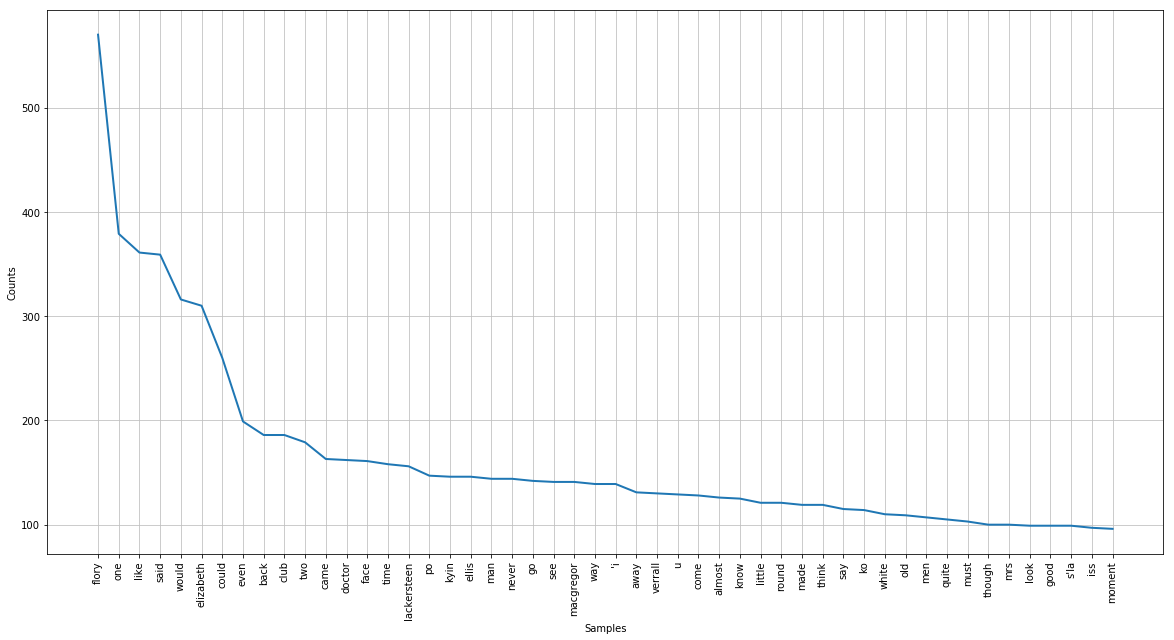

In [7]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [8]:
#順位チェック
sorted(freq_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('flory', 570),
 ('one', 379),
 ('like', 361),
 ('said', 359),
 ('would', 316),
 ('elizabeth', 310),
 ('could', 260),
 ('even', 199),
 ('back', 186),
 ('club', 186),
 ('two', 179),
 ('came', 163),
 ('doctor', 162),
 ('face', 161),
 ('time', 158),
 ('lackersteen', 156),
 ('po', 147),
 ('kyin', 146),
 ('ellis', 146),
 ('man', 144),
 ('never', 144),
 ('go', 142),
 ('see', 141),
 ('macgregor', 141),
 ('way', 139),
 ("'i", 139),
 ('away', 131),
 ('verrall', 130),
 ('u', 129),
 ('come', 128),
 ('almost', 126),
 ('know', 125),
 ('little', 121),
 ('round', 121),
 ('made', 119),
 ('think', 119),
 ('say', 115),
 ('ko', 114),
 ('white', 110),
 ('old', 109),
 ('men', 107),
 ('quite', 105),
 ('must', 103),
 ('though', 100),
 ('mrs', 100),
 ('look', 99),
 ('good', 99),
 ("s'la", 99),
 ('iss', 97),
 ('moment', 96),
 ('get', 94),
 ('got', 94),
 ("'ve", 94),
 ('went', 91),
 ('much', 91),
 ('long', 90),
 ('thought', 90),
 ('head', 89),
 ('something', 89),
 ('life', 87),
 ('turned', 86),
 ('every', 84),

In [9]:
#Turn all words to basic form
basic_form = [ps.stem(word) for word in tokens_low if not word in stopwords + symbols]

#Textを使うためにreviewをlistにぶち込む
basic_form = [basic_form]

#原型に戻した単語で、再び文を再構築する。
text = []
for i in basic_form:
    text.append(nltk.Text(i))
    
#Textからwords listを作る。
for i in text:
    words = [word for word in i]
    
words

['u',
 'po',
 'kyin',
 'sub-division',
 'magistr',
 'kyauktada',
 'upper',
 'burma',
 'sit',
 'veranda',
 'half',
 'past',
 'eight',
 'month',
 'april',
 'close',
 'air',
 'threat',
 'long',
 'stifl',
 'midday',
 'hour',
 'occasion',
 'faint',
 'breath',
 'wind',
 'seem',
 'cool',
 'contrast',
 'stir',
 'newli',
 'drench',
 'orchid',
 'hung',
 'eav',
 'beyond',
 'orchid',
 'one',
 'could',
 'see',
 'dusti',
 'curv',
 'trunk',
 'palm',
 'tree',
 'blaze',
 'ultramarin',
 'sky',
 'zenith',
 'high',
 'dazzl',
 'one',
 'look',
 'vultur',
 'circl',
 'without',
 'quiver',
 'wing',
 'unblink',
 'rather',
 'like',
 'great',
 'porcelain',
 'idol',
 'u',
 'po',
 'kyin',
 'gaze',
 'fierc',
 'sunlight',
 'man',
 'fifti',
 'fat',
 'year',
 'risen',
 'chair',
 'without',
 'help',
 'yet',
 'shape',
 'even',
 'beauti',
 'gross',
 'burmes',
 'sag',
 'bulg',
 'like',
 'white',
 'men',
 'grow',
 'fat',
 'symmetr',
 'like',
 'fruit',
 'swell',
 'face',
 'vast',
 'yellow',
 'quit',
 'unwrinkl',
 'eye',
 'ta

In [10]:
#Basic に直して、頻度を確認する
freq_list_basic = []
for i in text:
    freq_list_basic.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

#順位チェック
sorted(freq_list_basic[0].items(), key=lambda x: x[1], reverse=True)

[('flori', 570),
 ('one', 388),
 ('like', 375),
 ('said', 359),
 ('would', 316),
 ('elizabeth', 310),
 ('even', 282),
 ('could', 260),
 ('go', 224),
 ('look', 223),
 ('face', 206),
 ('come', 199),
 ('back', 193),
 ('club', 192),
 ('time', 190),
 ('two', 180),
 ('lackersteen', 170),
 ('came', 163),
 ('doctor', 163),
 ('way', 156),
 ("'i", 156),
 ('see', 155),
 ('say', 148),
 ('po', 147),
 ('kyin', 147),
 ('elli', 146),
 ('man', 145),
 ('never', 144),
 ('macgregor', 141),
 ('know', 140),
 ('think', 133),
 ('get', 133),
 ('verral', 132),
 ('away', 131),
 ('u', 129),
 ('hand', 129),
 ('talk', 129),
 ('almost', 126),
 ('round', 124),
 ('littl', 121),
 ('european', 120),
 ('thing', 119),
 ('made', 119),
 ('turn', 117),
 ('ko', 114),
 ('year', 113),
 ('white', 111),
 ('make', 111),
 ('day', 111),
 ('old', 109),
 ('men', 107),
 ('head', 107),
 ('girl', 107),
 ('moment', 106),
 ('quit', 105),
 ('thought', 105),
 ('must', 103),
 ('good', 101),
 ('though', 100),
 ("s'la", 99),
 ('iss', 97),
 ('pu

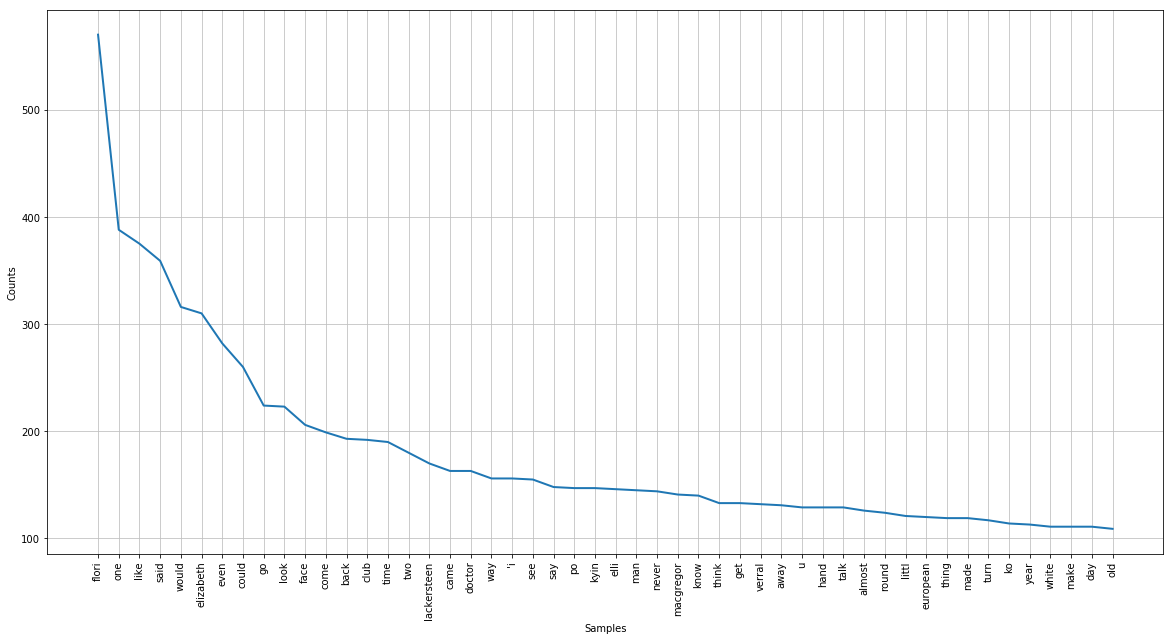

In [11]:
#Eliminate stopwords and symbols

import matplotlib.pyplot as plt
%matplotlib inline

freq_list_new = []
for i in text:
    freq_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in freq_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

In [12]:
#文章を小文字化
sentence_small = [w.lower() for w in sentence1]

#いけそう。文ごとに取り出し、それぞれの単語を原型に戻す。それを再び再構築する！
form_sent = []
for sentence in sentence_small:
    form = [ps.stem(word)  for word in sentence.split() if not word in stopwords + symbols]
    form_sent.append(" ".join(form))
    
    
#ピリオドやカンマを消しまーす。Delte period and comma...めんどい...
form_sent2 = []

for i in form_sent:
    tokens = nltk.word_tokenize(i)
    form = [word for word in tokens if not word in stopwords + symbols]
    form_sent2.append(" ".join(form))
    
    
#次にこの新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化したい
text = []

for i in form_sent2:
    tokens = nltk.word_tokenize(i)
    for j in tokens:
        text.append(j)
        
text = [text]

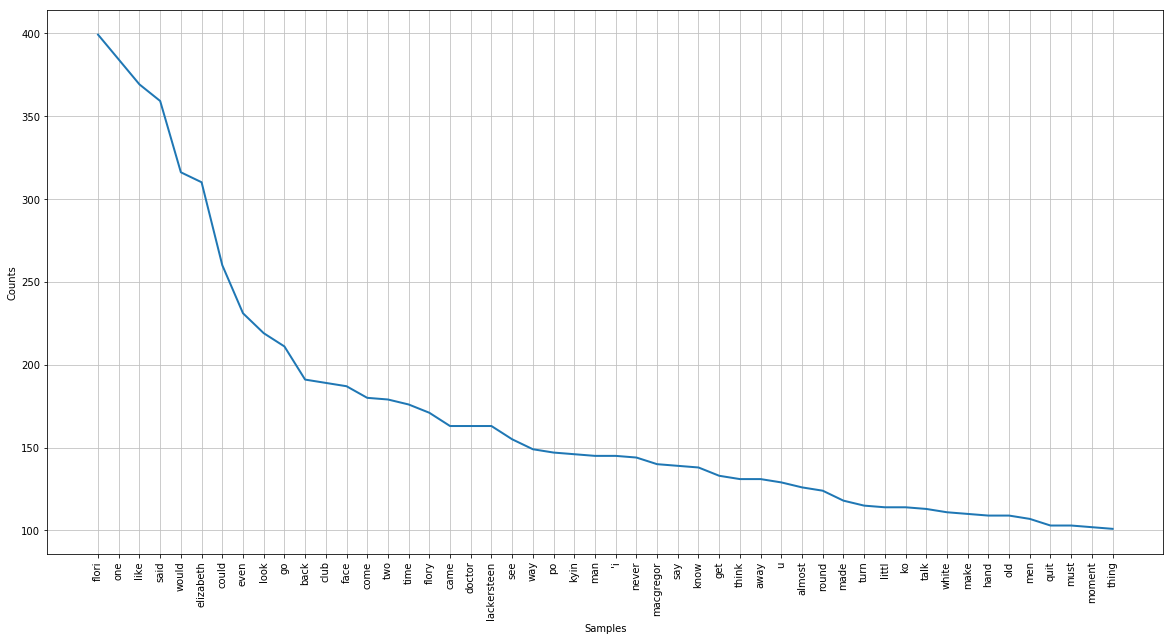

In [13]:
#新しく、原型に戻し、stopwordを取り除いた単語数をグラフ化

import matplotlib.pyplot as plt
%matplotlib inline

f_list_new = []
for i in text:
    f_list_new.append(nltk.FreqDist(w.lower() for w in i if w.lower() not in stopwords + symbols))

for i in f_list_new:
    plt.figure(figsize=(20,10))
    i.plot(50)

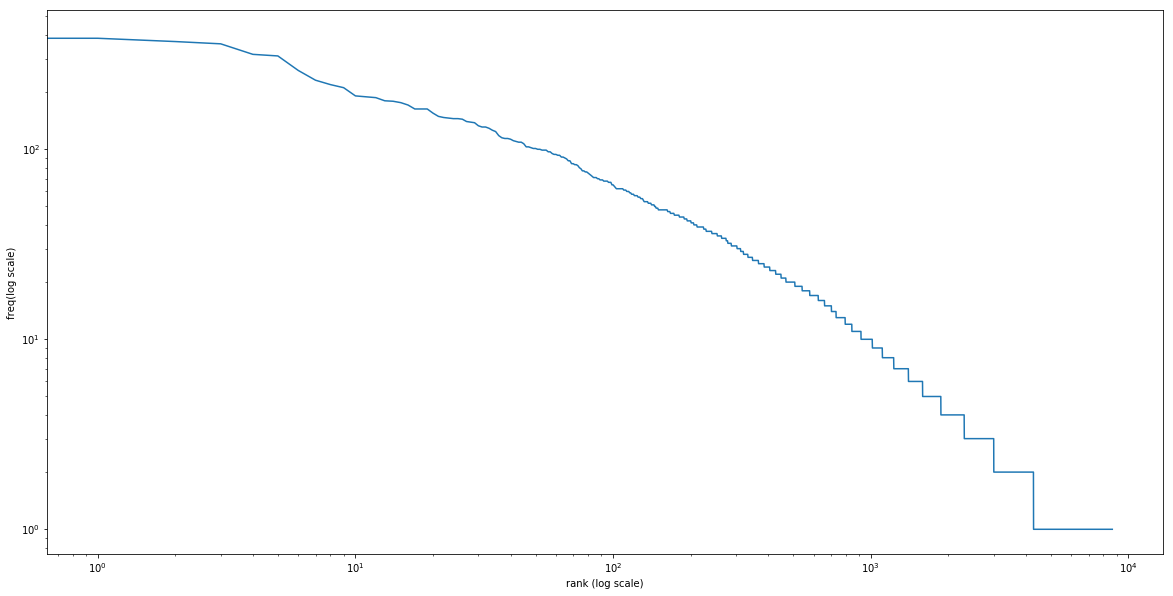

In [14]:
log_freq  = []
for i in f_list_new[0].values():
    log_freq.append(i)

#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_freq, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('freq(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

In [15]:
#順位チェック
sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

[('flori', 399),
 ('one', 384),
 ('like', 369),
 ('said', 359),
 ('would', 316),
 ('elizabeth', 310),
 ('could', 260),
 ('even', 231),
 ('look', 219),
 ('go', 211),
 ('back', 191),
 ('club', 189),
 ('face', 187),
 ('come', 180),
 ('two', 179),
 ('time', 176),
 ('flory', 171),
 ('came', 163),
 ('doctor', 163),
 ('lackersteen', 163),
 ('see', 155),
 ('way', 149),
 ('po', 147),
 ('kyin', 146),
 ('man', 145),
 ("'i", 145),
 ('never', 144),
 ('macgregor', 140),
 ('say', 139),
 ('know', 138),
 ('get', 133),
 ('think', 131),
 ('away', 131),
 ('u', 129),
 ('almost', 126),
 ('round', 124),
 ('made', 118),
 ('turn', 115),
 ('littl', 114),
 ('ko', 114),
 ('talk', 113),
 ('white', 111),
 ('make', 110),
 ('hand', 109),
 ('old', 109),
 ('men', 107),
 ('quit', 103),
 ('must', 103),
 ('moment', 102),
 ('thing', 101),
 ('good', 101),
 ('though', 100),
 ('girl', 100),
 ('head', 99),
 ('thought', 99),
 ("s'la", 99),
 ('european', 97),
 ('iss', 97),
 ('put', 95),
 ('day', 94),
 ('got', 94),
 ('long', 93),

In [16]:
# let's make new list only with words whose frequency  > 25

moreThan40_freq = []

for i,j in f_list_new[0].items():
    if j >= 40:
        moreThan40_freq.append(i)

In [17]:
# 頻出単語top2のgameshとsaidが同時に現れる文を、ピックアップしカウントするプログラムを全ての単語に割り当てる試み。

count_s = {}

for wn1 in range(0, len(moreThan40_freq)-1):
    for wn2 in range(wn1+1, len(moreThan40_freq)):
        s = 0
    
        for sent in form_sent2:
            index1 = 0
            index2 = 0
            
            #remove duplicate
            if moreThan40_freq[wn1] != moreThan40_freq[wn2]:
                
                if moreThan40_freq[wn1] in sent.split():
                    index1 += 1
                if moreThan40_freq[wn2] in sent.split():
                    index2 += 1
              
                if index1 > 0 and index2 > 0:
                    s += 1
                
        count_s.update({( moreThan40_freq[wn1], moreThan40_freq[wn2]) :s })
        

In [18]:
#順位チェック
sorted(count_s.items(), key=lambda x: x[1], reverse=True)

[(('po', 'kyin'), 142),
 (('u', 'po'), 125),
 (('u', 'kyin'), 124),
 (('ko', "s'la"), 94),
 (('may', 'hla'), 57),
 (('flori', 'elizabeth'), 53),
 (('said', 'flori'), 47),
 (('said', "'i"), 33),
 (('look', 'face'), 32),
 (('could', 'see'), 31),
 (('man', 'white'), 29),
 (('elizabeth', 'verral'), 28),
 (('one', 'like'), 27),
 (('look', 'like'), 26),
 (('one', 'could'), 25),
 (('even', 'would'), 25),
 (('said', 'westfield'), 23),
 (('flori', 'club'), 23),
 (('back', 'flori'), 22),
 (('said', 'lackersteen'), 22),
 (('one', 'flori'), 21),
 (('could', 'face'), 21),
 (('back', 'go'), 21),
 (('turn', 'away'), 21),
 (('said', 'elli'), 21),
 (("'i", "'m"), 21),
 (('away', 'yard'), 21),
 (('could', 'even'), 20),
 (('could', 'flori'), 19),
 (('could', 'elizabeth'), 19),
 (('like', 'white'), 19),
 (('like', 'face'), 19),
 (('face', 'yellow'), 19),
 (('european', 'club'), 19),
 (('lackersteen', 'elizabeth'), 19),
 (('even', 'elizabeth'), 18),
 (('turn', 'round'), 18),
 (('said', 'elizabeth'), 18),
 

In [19]:
#namely

new = {tuple(sorted(x)):y for x, y in count_s.items()}

#順位チェック again !
new2 = dict(sorted(new.items(), key=lambda x: x[1], reverse=True))

new3 = dict((k, v) for k, v in new2.items() if v >= 2)

#順位チェック again !
new4 = dict(sorted(new3.items(), key=lambda x: x[1], reverse=True))
new4

{('kyin', 'po'): 142,
 ('po', 'u'): 125,
 ('kyin', 'u'): 124,
 ('ko', "s'la"): 94,
 ('hla', 'may'): 57,
 ('elizabeth', 'flori'): 53,
 ('flori', 'said'): 47,
 ("'i", 'said'): 33,
 ('face', 'look'): 32,
 ('could', 'see'): 31,
 ('man', 'white'): 29,
 ('elizabeth', 'verral'): 28,
 ('like', 'one'): 27,
 ('like', 'look'): 26,
 ('could', 'one'): 25,
 ('even', 'would'): 25,
 ('said', 'westfield'): 23,
 ('club', 'flori'): 23,
 ('back', 'flori'): 22,
 ('lackersteen', 'said'): 22,
 ('flori', 'one'): 21,
 ('could', 'face'): 21,
 ('back', 'go'): 21,
 ('away', 'turn'): 21,
 ('elli', 'said'): 21,
 ("'i", "'m"): 21,
 ('away', 'yard'): 21,
 ('could', 'even'): 20,
 ('could', 'flori'): 19,
 ('could', 'elizabeth'): 19,
 ('like', 'white'): 19,
 ('face', 'like'): 19,
 ('face', 'yellow'): 19,
 ('club', 'european'): 19,
 ('elizabeth', 'lackersteen'): 19,
 ('elizabeth', 'even'): 18,
 ('round', 'turn'): 18,
 ('elizabeth', 'said'): 18,
 ('elizabeth', 'two'): 18,
 ('flori', 'ko'): 18,
 ('away', 'flori'): 18,
 ('f

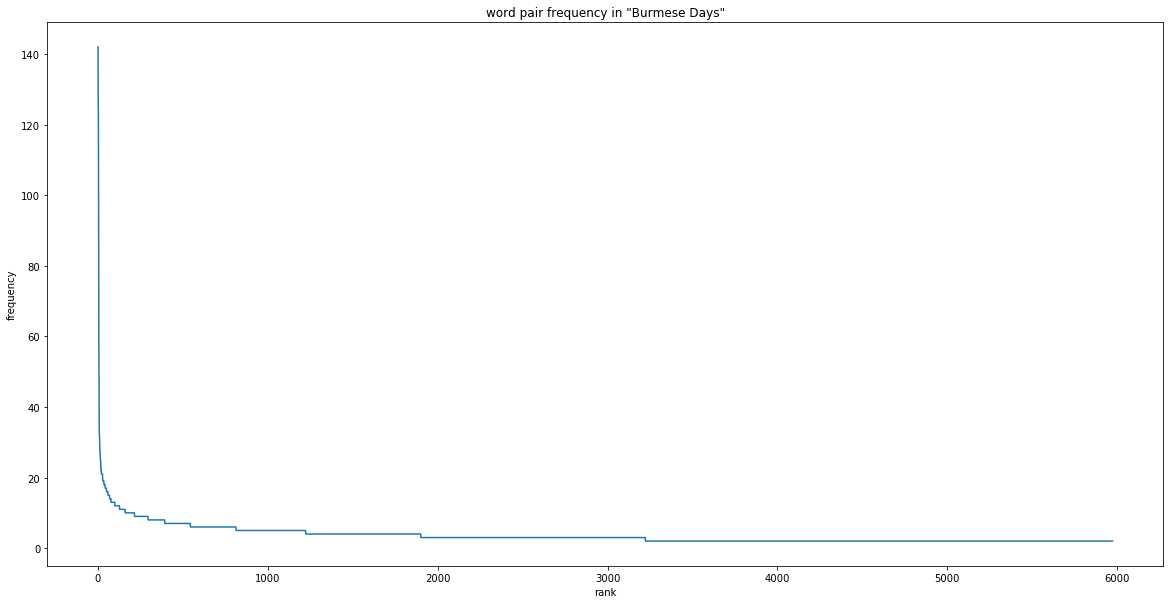

In [47]:
import matplotlib.pyplot as plt

pair_count = []
for pair, count in new4.items():
    pair_count.append(count)
    
plt.figure(figsize=(20,10))
plt.plot(sorted(pair_count, reverse=True))

plt.ylabel('frequency')
plt.xlabel('rank')
plt.title('word pair frequency in "Burmese Days"')
plt.show()

In [21]:
#単語順位チェック
word_f = sorted(f_list_new[0].items(), key=lambda x: x[1], reverse=True)

word_fdic = dict(word_f)
word_fdic

{'flori': 399,
 'one': 384,
 'like': 369,
 'said': 359,
 'would': 316,
 'elizabeth': 310,
 'could': 260,
 'even': 231,
 'look': 219,
 'go': 211,
 'back': 191,
 'club': 189,
 'face': 187,
 'come': 180,
 'two': 179,
 'time': 176,
 'flory': 171,
 'came': 163,
 'doctor': 163,
 'lackersteen': 163,
 'see': 155,
 'way': 149,
 'po': 147,
 'kyin': 146,
 'man': 145,
 "'i": 145,
 'never': 144,
 'macgregor': 140,
 'say': 139,
 'know': 138,
 'get': 133,
 'think': 131,
 'away': 131,
 'u': 129,
 'almost': 126,
 'round': 124,
 'made': 118,
 'turn': 115,
 'littl': 114,
 'ko': 114,
 'talk': 113,
 'white': 111,
 'make': 110,
 'hand': 109,
 'old': 109,
 'men': 107,
 'quit': 103,
 'must': 103,
 'moment': 102,
 'thing': 101,
 'good': 101,
 'though': 100,
 'girl': 100,
 'head': 99,
 'thought': 99,
 "s'la": 99,
 'european': 97,
 'iss': 97,
 'put': 95,
 'day': 94,
 'got': 94,
 'long': 93,
 'elli': 93,
 'went': 91,
 'much': 91,
 'take': 90,
 'year': 89,
 'life': 87,
 'verral': 87,
 'everi': 84,
 'behind': 84,
 

In [22]:
count = 0
s_value = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    s_value.append(s)
    
    count += 1
    
    if count == 1000:
        break
        
        
count = 0
p_values = []

for i, j in new2.items():
    #print (i)
    
    s = j / (word_fdic[i[0]]  * word_fdic[i[1]])
    p = (word_fdic[i[0]]  * word_fdic[i[1]]) * s * s
    p_values.append(p)
    
    count += 1
    
    if count == 1000:
        break

In [23]:
max(p_values)

0.9395210138850061

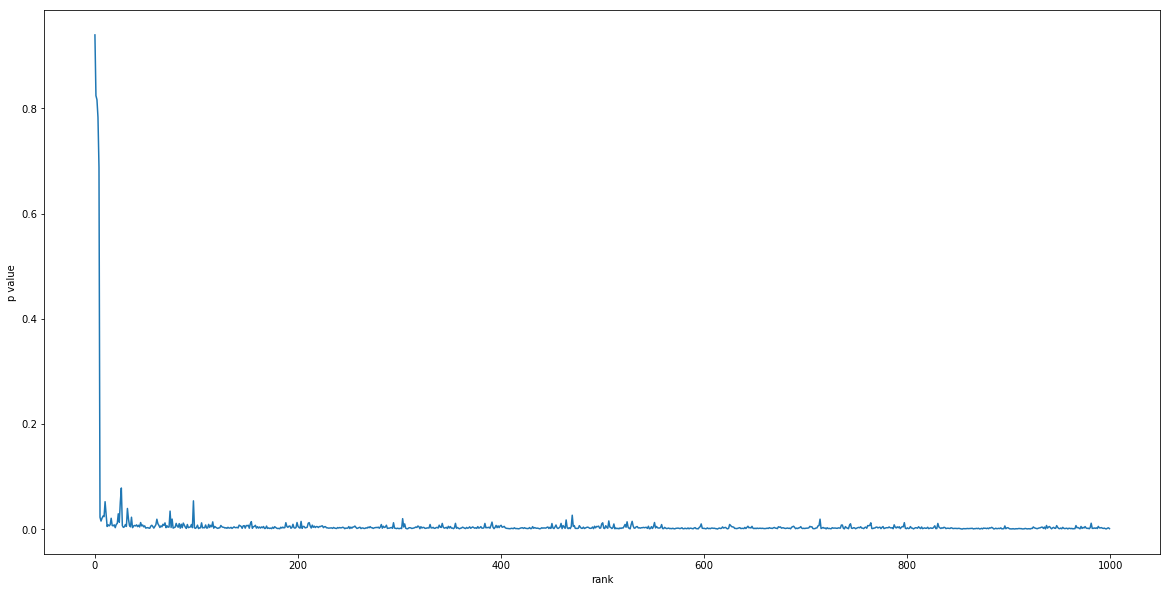

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(p_values)

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

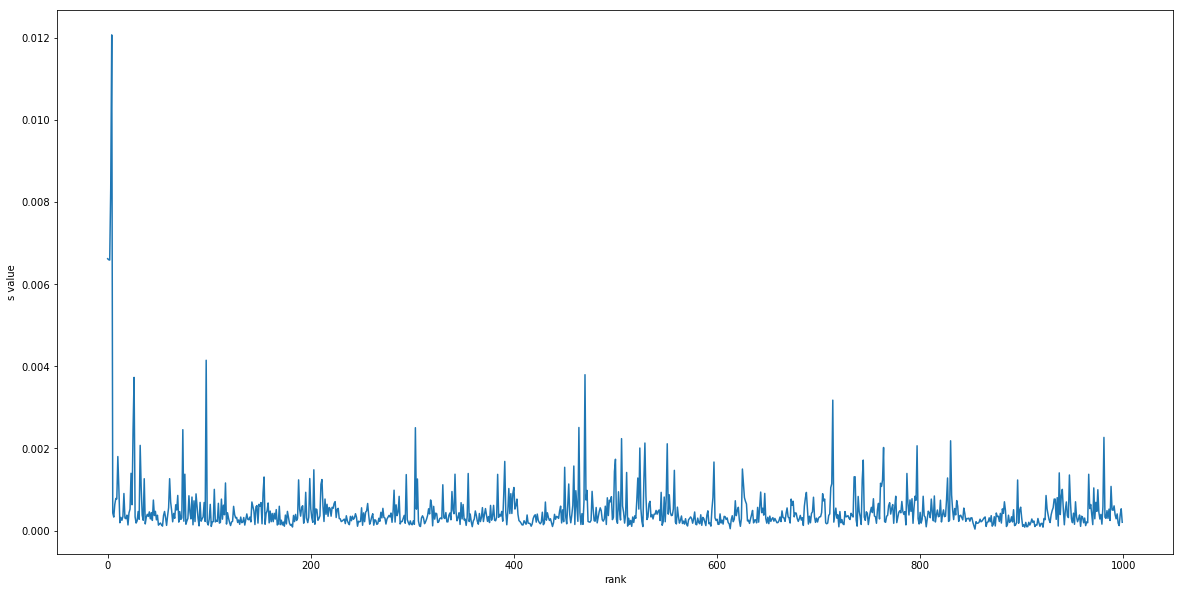

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(s_value)

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

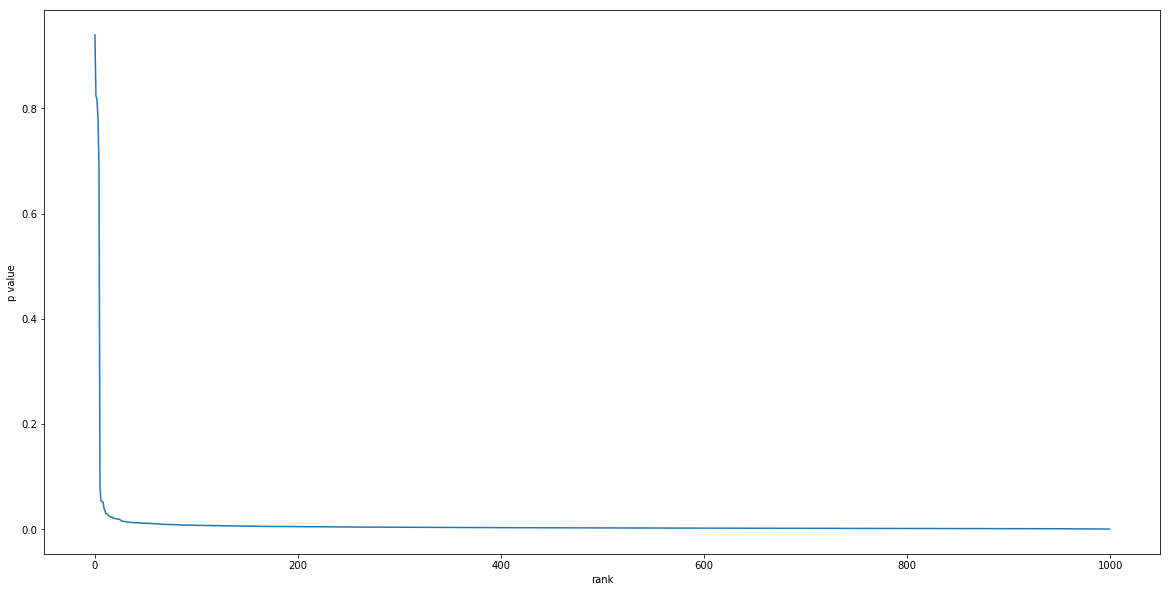

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(p_values, reverse=True))

plt.ylabel('p value')
plt.xlabel('rank')
plt.show()

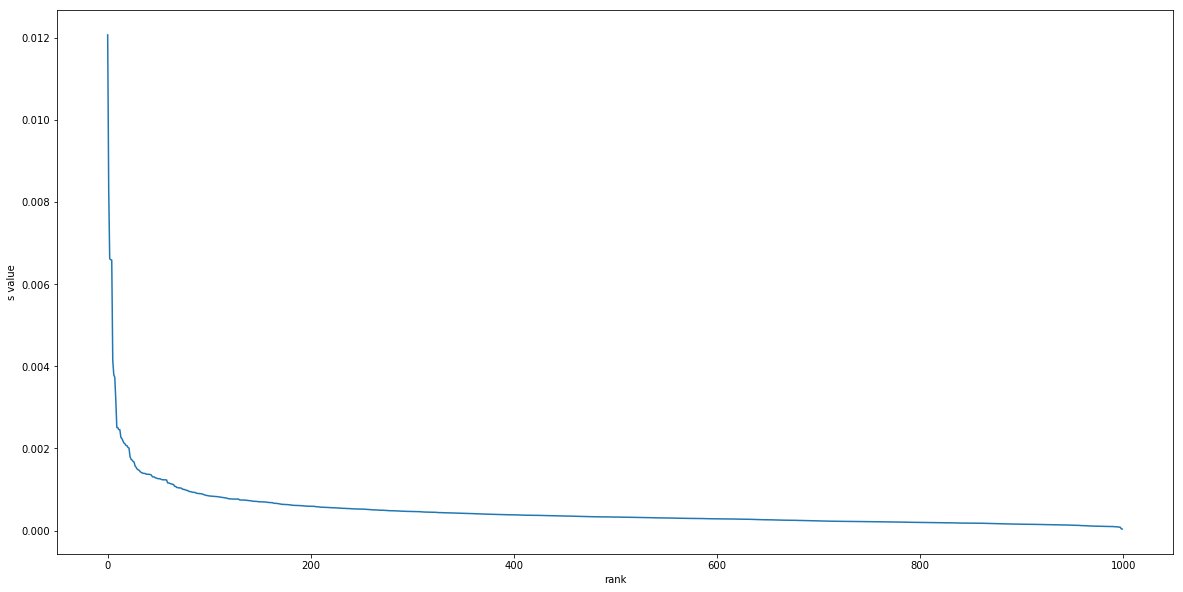

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))

plt.ylabel('s value')
plt.xlabel('rank')
plt.show()

In [28]:
s_value_top_5 = sorted(s_value, reverse=True)[:6]
s_value_top_5

[0.012063492063492064,
 0.008328903065745172,
 0.006616345168204268,
 0.006591784000421874,
 0.006583837740256982,
 0.004145408163265306]

In [29]:
print(s_value.index(s_value_top_5[0]))
print(s_value.index(s_value_top_5[1]))
print(s_value.index(s_value_top_5[2]))
print(s_value.index(s_value_top_5[3]))
print(s_value.index(s_value_top_5[4]))

4
3
0
1
2


In [30]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[0]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'hla':
        print(i,j)
    elif i ==  'may':
        print(i,j)

('hla', 'may') 57
may 75
hla 63


In [31]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[1]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'ko':
        print(i,j)
    elif i ==  "s'la":
        print(i,j)

('ko', "s'la") 94
ko 114
s'la 99


In [32]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[2]):
        print(i,j)
    count += 1
    
for i,j in word_fdic.items():
    if i == 'kyin':
        print(i,j)
    elif i ==  'po':
        print(i,j)

('kyin', 'po') 142
po 147
kyin 146


In [33]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[3]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'po':
        print(i,j)
    elif i ==  'u':
        print(i,j)

('po', 'u') 125
po 147
u 129


In [34]:
count = 0
for i, j in new2.items():
    if count == s_value.index(s_value_top_5[4]):
        print(i,j)
    count += 1
    
    
for i,j in word_fdic.items():
    if i == 'kyin':
        print(i,j)
    elif i ==  'u':
        print(i,j)

('kyin', 'u') 124
kyin 146
u 129


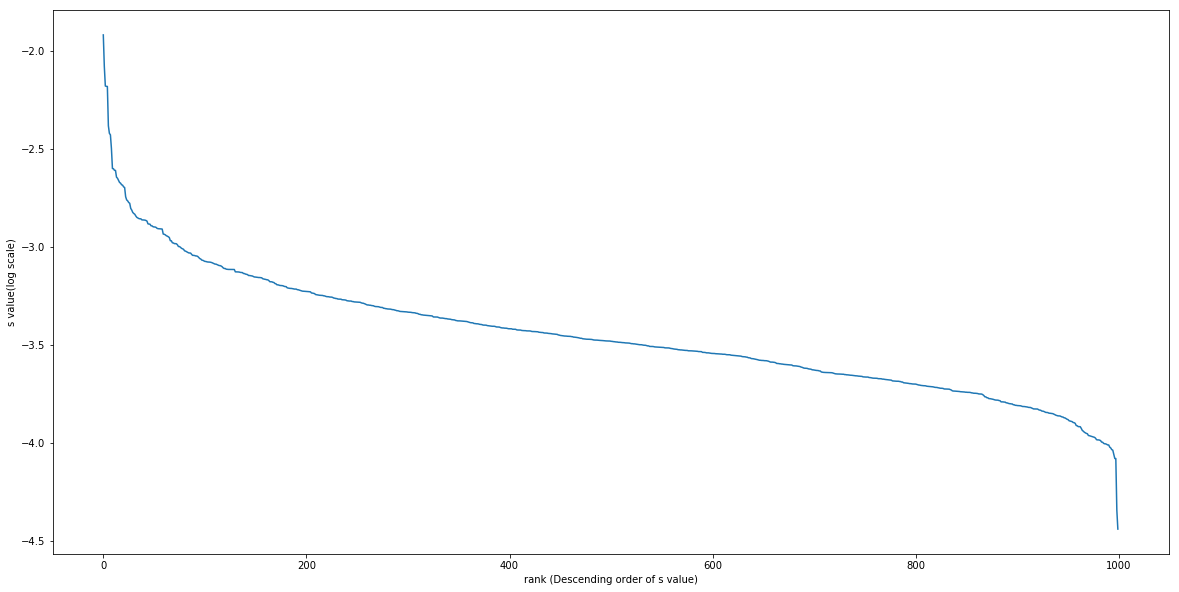

In [35]:
from math import log
log_list = [log(y,10) for y in s_value]

#take a log
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(log_list, reverse=True))

plt.ylabel('s value(log scale)')
plt.xlabel('rank (Descending order of s value)')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


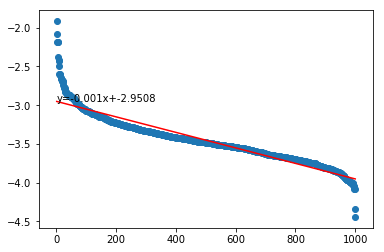

In [36]:
#take a log
import matplotlib.pyplot as plt
import numpy as np

x = range(1, len(log_list)+1)
y = sorted(log_list, reverse=True)


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

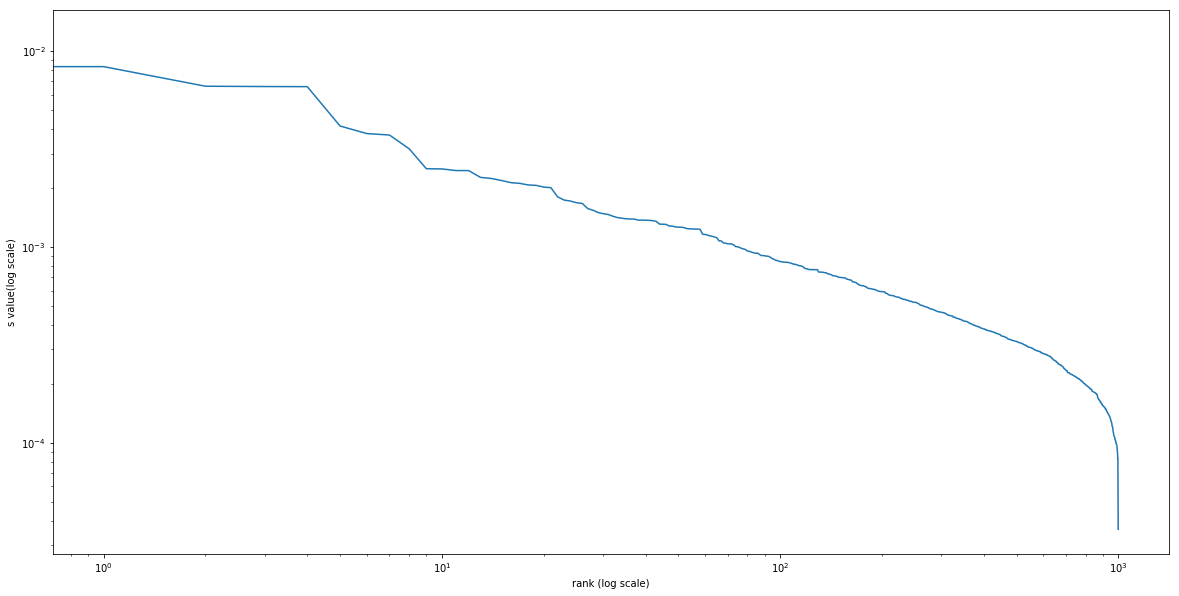

In [37]:
#take a log log graph
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(sorted(s_value, reverse=True))
plt.xscale("log")
plt.yscale("log")
plt.ylabel('s value(log scale)')
plt.xlabel('rank (log scale)')
plt.show()

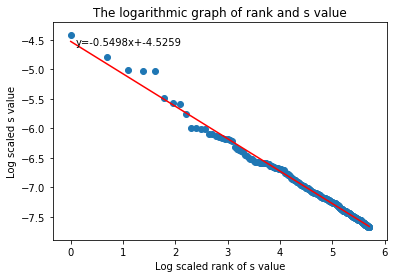

In [46]:
from math import log

sorted_list = sorted(s_value, reverse=True)
sorted_list

log_list = [log(i) for i in sorted_list]
log_x = [log(i) for i in  range(1, len(s_value)+1)]


#take a log
import matplotlib.pyplot as plt
import numpy as np

x = np.array(log_x[:-700])
y = np.array(log_list[:-700])


plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
a, b = np.polyfit(x, y, deg=1)
#fit = np.polyfit(x, y, deg=1)
# フィッティング直線
y2 = a * x + b

ax.plot(x, y2, color='red')
ax.text(0.1,a*0.1+b, 'y='+ str(round(a,4)) +'x+'+str(round(b,4)))
ax.scatter(x, y)

ax.set_title('The logarithmic graph of rank and s value')
ax.set_xlabel('Log scaled rank of s value')
ax.set_ylabel('Log scaled s value')
#plt.figure(figsize=(20,10))
#plt.plot(x, y)

#plt.ylabel('s value')
#plt.xlabel('words (Descending order of s value)')
#plt.show()

In [39]:
# i,j count
import numpy as np

len(word_f)

8659

In [40]:
i = np.arange(len(word_f), 0, -1)
j = np.arange(1,len(word_f)+1, 1)

def square(list):
    return [i ** -2 for i in list]
square(i)

[1.3337195607351948e-08,
 1.3340276680540021e-08,
 1.3343358821506009e-08,
 1.334644203074337e-08,
 1.3349526308745842e-08,
 1.3352611656007455e-08,
 1.335569807302252e-08,
 1.3358785560285635e-08,
 1.3361874118291683e-08,
 1.3364963747535834e-08,
 1.3368054448513546e-08,
 1.337114622172056e-08,
 1.3374239067652907e-08,
 1.3377332986806899e-08,
 1.3380427979679144e-08,
 1.338352404676653e-08,
 1.3386621188566236e-08,
 1.3389719405575726e-08,
 1.3392818698292755e-08,
 1.3395919067215363e-08,
 1.3399020512841883e-08,
 1.3402123035670929e-08,
 1.3405226636201412e-08,
 1.3408331314932526e-08,
 1.3411437072363756e-08,
 1.3414543908994876e-08,
 1.3417651825325949e-08,
 1.3420760821857331e-08,
 1.3423870899089661e-08,
 1.3426982057523876e-08,
 1.3430094297661199e-08,
 1.3433207620003142e-08,
 1.3436322025051511e-08,
 1.3439437513308402e-08,
 1.3442554085276202e-08,
 1.3445671741457589e-08,
 1.3448790482355529e-08,
 1.3451910308473289e-08,
 1.3455031220314416e-08,
 1.345815321838276e-08,
 1.34

In [41]:
middle = len(square(j)) / 2
print(int(middle))

middle = len(square(i)) / 2
print (int(middle))

4329
4329


In [42]:
square(j)[int(middle)]

5.333646240579447e-08

In [43]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (int(middle)**2) / (x)

myu = integrate.quad(computePi, 1, int(middle)**2)

# 結果にはintegrated value and estimation error
myu

(313827518.272396, 0.2987217007126901)

In [44]:
(4329**2) * log(4329**2)

313827518.2723959

In [45]:
import numpy as np
from scipy import integrate

def computePi(x):
    return (5.333646240579447e-08**2) / (x)

myu = integrate.quad(computePi, 1, (5.333646240579447e-08**2))
print(myu)

(-2.3912568527702252e-14, 2.6600270512636902e-14)
